In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
users = pd.read_csv(r"/Users/tugrulcicekci/Desktop/Portföy Projeleri/5.SaaS/Project-5 Datasets NEW/cleaned_users.csv")
events = pd.read_csv(r"/Users/tugrulcicekci/Desktop/Portföy Projeleri/5.SaaS/Project-5 Datasets NEW/cleaned_events.csv")

In [3]:
users.head()

,Unnamed: 0,user_id,registration_date,initial_plan_type,trial_start_date,trial_end_date,first_paid_date,current_plan_type,churn_date,industry,company_size,acquisition_channel,days_active,first_active_week,first_active_month
0,0,1,2024-06-09,Trial,2024-06-09,2024-06-23,2051-10-25,Churned,2024-07-18,Tech,1-10,Organic,6,24,6
1,1,2,2025-04-22,Trial,2025-04-22,2025-05-06,2052-09-06,Churned,2025-06-17,Tech,500+,Referral,14,18,5
2,2,3,2024-03-26,Trial,2024-03-26,2024-04-09,2051-08-11,Cancelled,2024-05-13,Healthcare,201-500,Paid Ads,11,13,3
3,3,4,2025-05-14,Trial,2025-05-14,2025-05-28,2052-09-28,Cancelled,2025-06-07,Healthcare,1-10,Partner,10,20,5
4,4,5,2024-09-28,Free,2024-09-28,2024-10-12,2025-04-03,Cancelled,2025-03-12,Education,11-50,Referral,7,42,10


In [4]:
events.head()

,Unnamed: 0,event_id,user_id,timestamp,event_name,session_id,week_of_year,month_of_year
0,0,1,359,2025-04-12,export_clicked,f3496cfe-6ec7-4339-9ad5-0025061f9d56,15,4
1,1,2,403,2025-02-18,dashboard_view,87d3d1f4-3a86-46e9-8dc4-219c3a0e6c7f,8,2
2,2,3,311,2024-12-23,dashboard_view,a1f68fd0-318c-459b-b414-b019ea010b2e,52,12
3,3,4,498,2024-05-14,login,e72d9368-a723-48a8-b44b-07c5f55525b2,20,5
4,4,5,37,2025-11-02,login,07642b48-7e0f-4964-9c87-78565c69bcc5,44,11


In [5]:
users.drop(columns=["Unnamed: 0"], inplace=True)
events.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
users.head()

,user_id,registration_date,initial_plan_type,trial_start_date,trial_end_date,first_paid_date,current_plan_type,churn_date,industry,company_size,acquisition_channel,days_active,first_active_week,first_active_month
0,1,2024-06-09,Trial,2024-06-09,2024-06-23,2051-10-25,Churned,2024-07-18,Tech,1-10,Organic,6,24,6
1,2,2025-04-22,Trial,2025-04-22,2025-05-06,2052-09-06,Churned,2025-06-17,Tech,500+,Referral,14,18,5
2,3,2024-03-26,Trial,2024-03-26,2024-04-09,2051-08-11,Cancelled,2024-05-13,Healthcare,201-500,Paid Ads,11,13,3
3,4,2025-05-14,Trial,2025-05-14,2025-05-28,2052-09-28,Cancelled,2025-06-07,Healthcare,1-10,Partner,10,20,5
4,5,2024-09-28,Free,2024-09-28,2024-10-12,2025-04-03,Cancelled,2025-03-12,Education,11-50,Referral,7,42,10


In [8]:
events.head()

,event_id,user_id,timestamp,event_name,session_id,week_of_year,month_of_year
0,1,359,2025-04-12,export_clicked,f3496cfe-6ec7-4339-9ad5-0025061f9d56,15,4
1,2,403,2025-02-18,dashboard_view,87d3d1f4-3a86-46e9-8dc4-219c3a0e6c7f,8,2
2,3,311,2024-12-23,dashboard_view,a1f68fd0-318c-459b-b414-b019ea010b2e,52,12
3,4,498,2024-05-14,login,e72d9368-a723-48a8-b44b-07c5f55525b2,20,5
4,5,37,2025-11-02,login,07642b48-7e0f-4964-9c87-78565c69bcc5,44,11


In [13]:
users["registration_date"] = pd.to_datetime(users["registration_date"])
events["timestamp"] = pd.to_datetime(events["timestamp"])

users["cohort_month"] = users["registration_date"].dt.to_period("M")


events_with_cohort = events.merge(
    users[["user_id", "registration_date", "cohort_month"]],
    on="user_id"
)

events_with_cohort["days_since_registration"] = (
    events_with_cohort["timestamp"] - events_with_cohort["registration_date"]
).dt.days

events_with_cohort["weeks_since_registration"] = (
    events_with_cohort["days_since_registration"] // 7
)

events_with_cohort["months_since_registration"] = (
    events_with_cohort["days_since_registration"] // 30
)

events_with_cohort.head()

,event_id,user_id,timestamp,event_name,session_id,week_of_year,month_of_year,registration_date,cohort_month,days_since_registration,weeks_since_registration,months_since_registration
0,1,359,2025-04-12,export_clicked,f3496cfe-6ec7-4339-9ad5-0025061f9d56,15,4,2025-04-08,2025-04,4,0,0
1,2,403,2025-02-18,dashboard_view,87d3d1f4-3a86-46e9-8dc4-219c3a0e6c7f,8,2,2025-02-10,2025-02,8,1,0
2,3,311,2024-12-23,dashboard_view,a1f68fd0-318c-459b-b414-b019ea010b2e,52,12,2024-11-29,2024-11,24,3,0
3,4,498,2024-05-14,login,e72d9368-a723-48a8-b44b-07c5f55525b2,20,5,2024-05-03,2024-05,11,1,0
4,5,37,2025-11-02,login,07642b48-7e0f-4964-9c87-78565c69bcc5,44,11,2025-10-30,2025-10,3,0,0


In [17]:
retention_table = events_with_cohort.groupby(["cohort_month", "weeks_since_registration"])["user_id"].nunique().reset_index()
cohort_size = users.groupby("cohort_month")["user_id"].nunique()
retention_table = retention_table.merge(cohort_size.rename("cohort_size"), left_on="cohort_month", right_index=True)
retention_table["retention_rate"] = retention_table["user_id"] / retention_table["cohort_size"]

retention_table.head()

,cohort_month,weeks_since_registration,user_id,cohort_size,retention_rate
0,2024-01,0,12,18,0.666667
1,2024-01,1,11,18,0.611111
2,2024-01,2,10,18,0.555556
3,2024-01,3,8,18,0.444444
4,2024-01,4,14,18,0.777778


In [19]:
retention_table["retention_rate"] = retention_table["retention_rate"].round(2)
retention_table.head()

,cohort_month,weeks_since_registration,user_id,cohort_size,retention_rate
0,2024-01,0,12,18,0.67
1,2024-01,1,11,18,0.61
2,2024-01,2,10,18,0.56
3,2024-01,3,8,18,0.44
4,2024-01,4,14,18,0.78


<Axes: xlabel='weeks_since_registration', ylabel='retention_rate'>

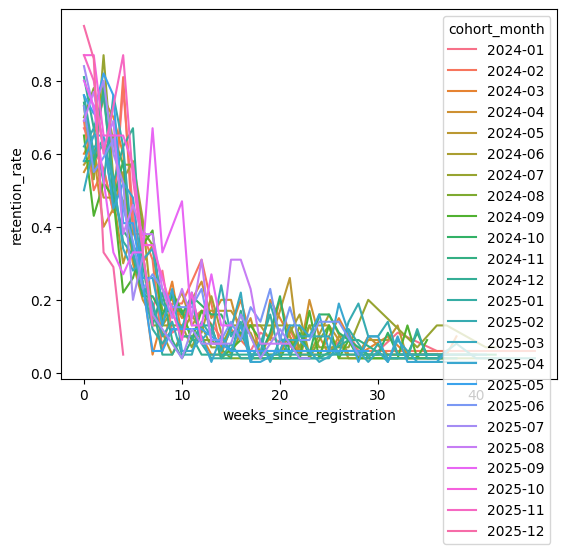

In [21]:
sns.lineplot(data=retention_table, 
             x='weeks_since_registration', 
             y='retention_rate', 
             hue='cohort_month')

<Axes: xlabel='weeks_since_registration', ylabel='retention_rate'>

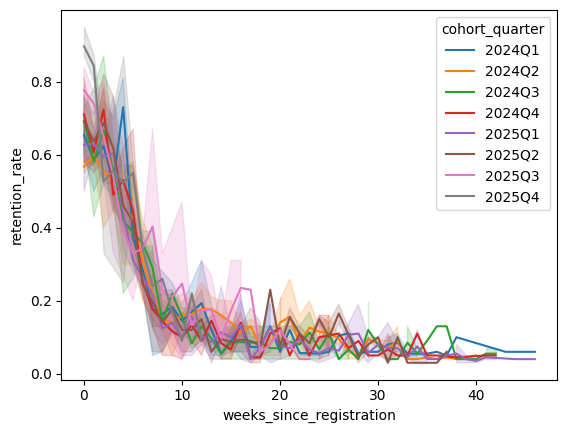

In [28]:
retention_table["cohort_quarter"] = retention_table["cohort_month"].dt.to_timestamp().dt.to_period("Q") 

sns.lineplot(data=retention_table,
             x='weeks_since_registration',
             y='retention_rate', 
             hue='cohort_quarter')

Text(0.5, 1.0, 'Cohort Retention (First 4 Quarters)')

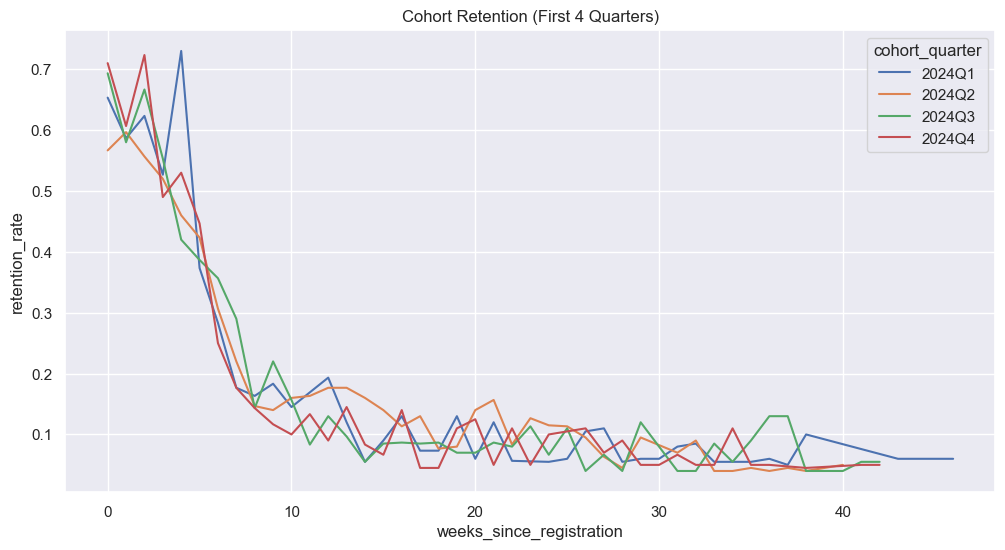

In [37]:
quarters = sorted(retention_table["cohort_quarter"].unique())

# Split into two groups (first 4, next 4)
group1 = quarters[:4]
group2 = quarters[4:8]

# First graph (first 4 quarters)
sns.set(rc={"figure.figsize":(12, 6)})
sns.lineplot(
    data=retention_table[retention_table["cohort_quarter"].isin(group1)],
    x="weeks_since_registration",
    y="retention_rate",
    hue="cohort_quarter",
    errorbar=None
).set_title("Cohort Retention (First 4 Quarters)")

Text(0.5, 1.0, 'Cohort Retention (Next 4 Quarters)')

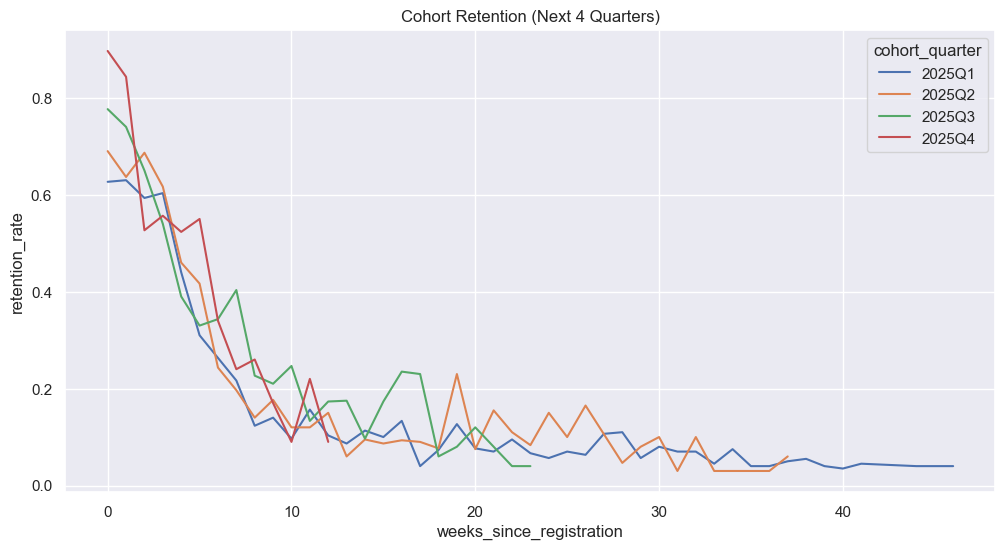

In [38]:
# Second graph (next 4 quarters)
sns.set(rc={"figure.figsize":(12, 6)})
sns.lineplot(
    data=retention_table[retention_table["cohort_quarter"].isin(group2)],
    x="weeks_since_registration",
    y="retention_rate",
    hue="cohort_quarter",
    errorbar=None #**Errorbar
).set_title("Cohort Retention (Next 4 Quarters)")

Feature Usage Analysis:

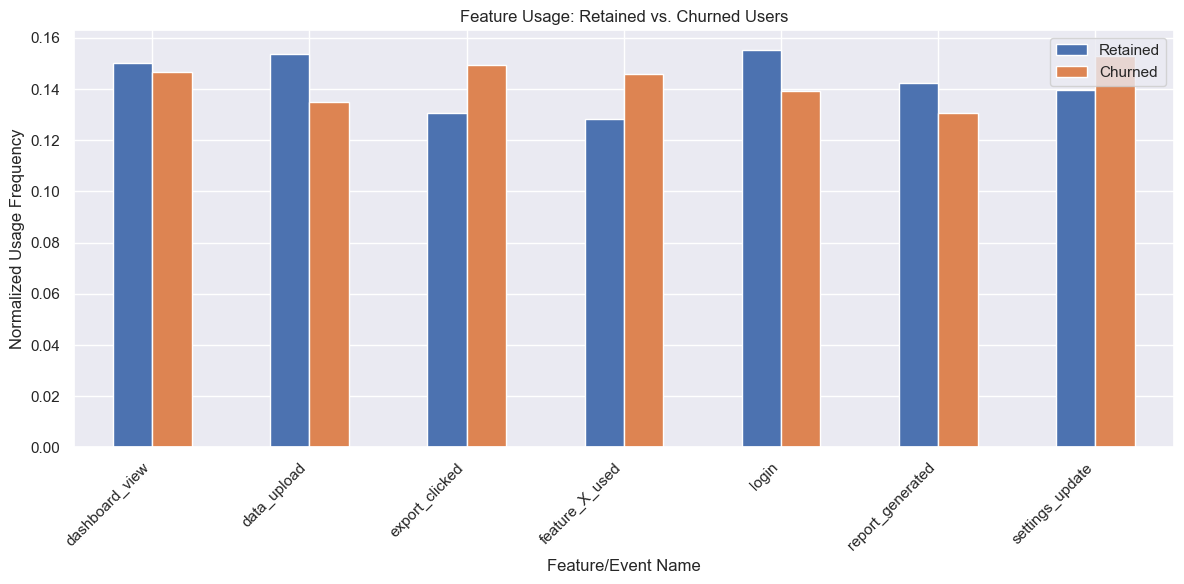

In [39]:
#Merge the events data with the users data to get a combined view
merged_data = pd.merge(events, users, on="user_id", how="left")

#Filter data
retained_users_events = merged_data[merged_data["current_plan_type"].isin(["Basic", "Pro"])]
churned_users_events = merged_data[merged_data["current_plan_type"] == "Churned"]

#Count and normalize feature usage
retained_usage = retained_users_events["event_name"].value_counts(normalize=True)
churned_usage = churned_users_events["event_name"].value_counts(normalize=True)

#Combine the data for comparison
usage_comparison_df = pd.DataFrame({"Retained": retained_usage, "Churned": churned_usage}).fillna(0) 

usage_comparison_df.plot(kind="bar", figsize=(12, 6))
plt.title("Feature Usage: Retained vs. Churned Users")
plt.ylabel("Normalized Usage Frequency")
plt.xlabel("Feature/Event Name")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [40]:
#Filter events that occurred during the trial period
merged_data["timestamp"] = pd.to_datetime(merged_data["timestamp"])
merged_data["trial_end_date"] = pd.to_datetime(merged_data["trial_end_date"])

trial_events = merged_data[
    (merged_data["initial_plan_type"] == "Trial") &
    (merged_data["timestamp"] <= merged_data["trial_end_date"])
]

#Separate and count events for converted vs non-converted
converted_trial_events = trial_events[trial_events["first_paid_date"].notna()] 
non_converted_trial_events = trial_events[trial_events["first_paid_date"].isna()]

converted_usage = converted_trial_events["event_name"].value_counts(normalize=True)
non_converted_usage = non_converted_trial_events["event_name"].value_counts(normalize=True)

Disclaimer: The code and analysis presented  were originally developed using a dataset that contained unrealistic trial conversion rates. (Slight changes for getting more realistic trial conversion rates were made on the cleaned versions of the datasets. Changed versions of the cleaned datasets can be found inside the repository at Data/Data Used In Tableau/) The results of the analysis below will show unrealistic results because of this problem.(Analysis above didn't affected from this issue) 

<Figure size 1400x800 with 0 Axes>

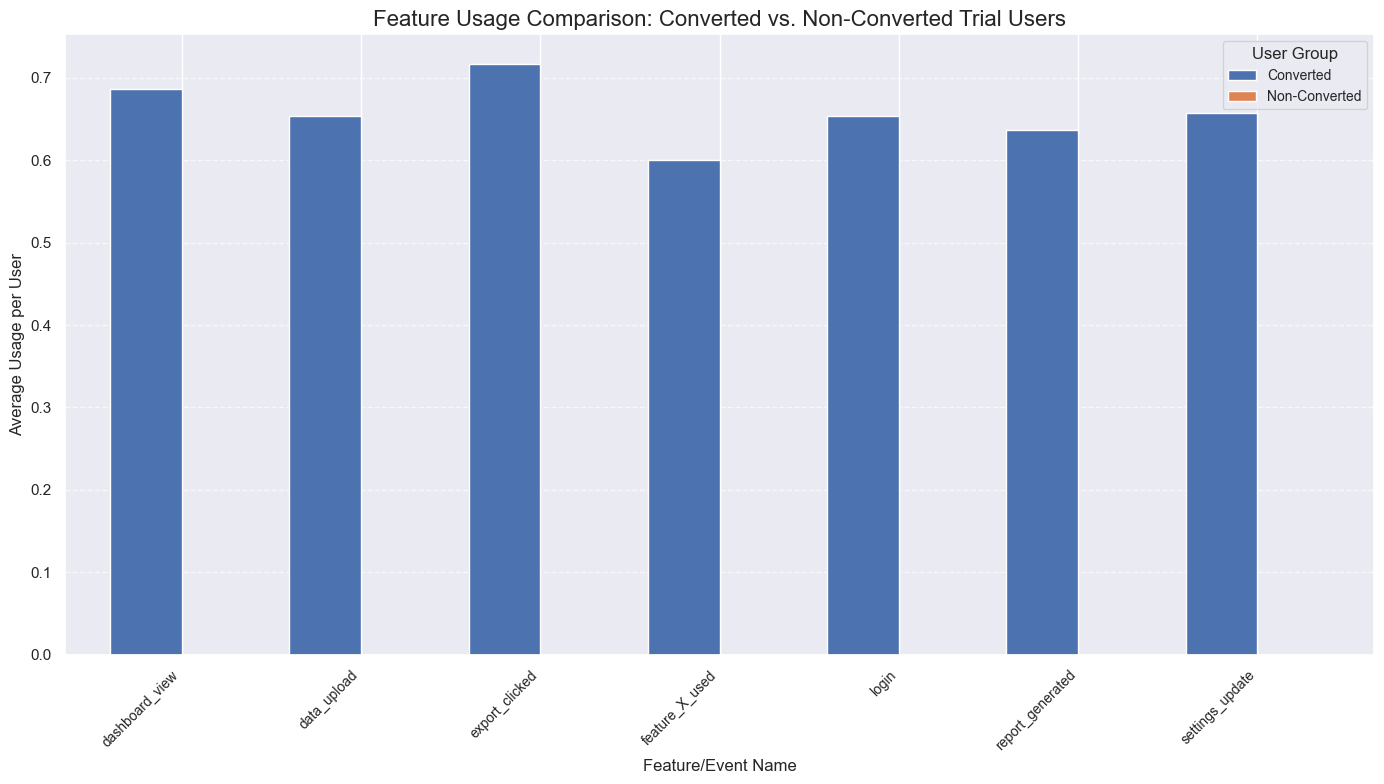

In [41]:
converted_usage_counts = converted_trial_events["event_name"].value_counts()
non_converted_usage_counts = non_converted_trial_events["event_name"].value_counts()

converted_usage_normalized = converted_usage_counts / len(converted_trial_events["user_id"].unique())
non_converted_usage_normalized = non_converted_usage_counts / len(non_converted_trial_events["user_id"].unique())

# Combine the two series into a single df for easier plotting
usage_comparison_df = pd.DataFrame({
    "Converted": converted_usage_normalized,
    "Non-Converted": non_converted_usage_normalized
}).fillna(0) 

# Plotting with a bar chart
plt.figure(figsize=(14, 8))
ax = usage_comparison_df.plot(kind="bar", figsize=(14, 8), width=0.8)
plt.title("Feature Usage Comparison: Converted vs. Non-Converted Trial Users", fontsize=16)
plt.xlabel("Feature/Event Name", fontsize=12)
plt.ylabel("Average Usage per User", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="User Group", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.tight_layout() 
plt.show()

In [42]:
total_trial_users = users[users["initial_plan_type"] == "Trial"].shape[0] 

# Count the number of converted users 
converted_users = users[(users["initial_plan_type"] == "Trial") & (users["first_paid_date"].notna())].shape[0]

# Calculating conversion rate
trial_conversion_rate = (converted_users / total_trial_users) * 100

print(f"Overall Trial Conversion Rate: {trial_conversion_rate:.2f}%")

Overall Trial Conversion Rate: 100.00%


In [43]:
#1. Average Number of Events
#Group by user_id and count the number of events for each user
user_event_counts = trial_events.groupby("user_id")["event_id"].count().to_frame("event_count")
user_behavior = pd.merge(user_event_counts, users[["user_id", "first_paid_date"]], on="user_id", how="left")

avg_events_converted = user_behavior[user_behavior["first_paid_date"].notna()]["event_count"].mean()
avg_events_non_converted = user_behavior[user_behavior["first_paid_date"].isna()]["event_count"].mean()

print(f"Average events per user (Converted): {avg_events_converted:.2f}")
print(f"Average events per user (Non-Converted): {avg_events_non_converted:.2f}")

#2. Average Days Active 
#Get a count of unique days active for each user during their trial
trial_events["date_only"] = trial_events["timestamp"].dt.date
user_active_days = trial_events.groupby("user_id")["date_only"].nunique().to_frame("days_active")
user_behavior_days = pd.merge(user_active_days, users[["user_id", "first_paid_date"]], on="user_id", how="left")

avg_days_active_converted = user_behavior_days[user_behavior_days["first_paid_date"].notna()]["days_active"].mean()
avg_days_active_non_converted = user_behavior_days[user_behavior_days["first_paid_date"].isna()]["days_active"].mean()

print(f"Average days active per user (Converted): {avg_days_active_converted:.2f}")
print(f"Average days active per user (Non-Converted): {avg_days_active_non_converted:.2f}")

Average events per user (Converted): 4.60
Average events per user (Non-Converted): nan
Average days active per user (Converted): 3.85
Average days active per user (Non-Converted): nan


/var/folders/15/7ltc9zw1301f359h7gmv9g0r0000gn/T/ipykernel_41497/695583920.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_events['date_only'] = trial_events['timestamp'].dt.date
